In [1]:
import picasso

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
character_matrix = picasso.load_data()
character_matrix.head()

,chr01:115902745-118644250,chr01:131500-5928100,chr01:13368000-16803650,chr01:145326112-152009500,chr01:153197786-156721600,chr01:157095900-223815700,chr01:17550067-24288404,chr01:223971718-226626277,chr01:226626574-248756994,chr01:24288404-46764050,...,chr22:16366264-18389548,chr22:18981850-19885800,chr22:19886350-21982550,chr22:21982726-25202550,chr22:25334447-28147100,chr22:28489900-31795550,chr22:31795769-33777900,chr22:33778050-43089833,chr22:43090050-49609850,chr22:49609850-51237409
RA19_10_21_FACs:121887344154339,-1,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,-1,0,-1,0,0,0
RA19_10_21_FACs:126347847362331,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
RA19_10_21_FACs:241038729046940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
RA19_10_21_FACs:230681442675422,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
RA19_10_21_FACs:240135605479845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(f'The character matrix has {character_matrix.shape[0]} samples and {character_matrix.shape[1]} features.')

The character matrix has 10000 samples and 116 features.


Text(0.5, 1.0, 'Character Matrix')

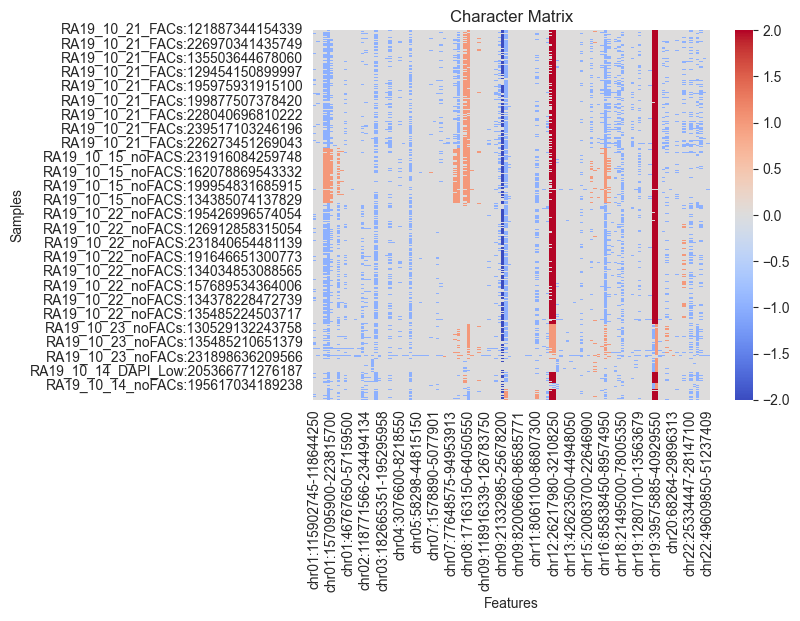

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(character_matrix, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Character Matrix')

The character encoded matrix has 10000 samples and 121 features.


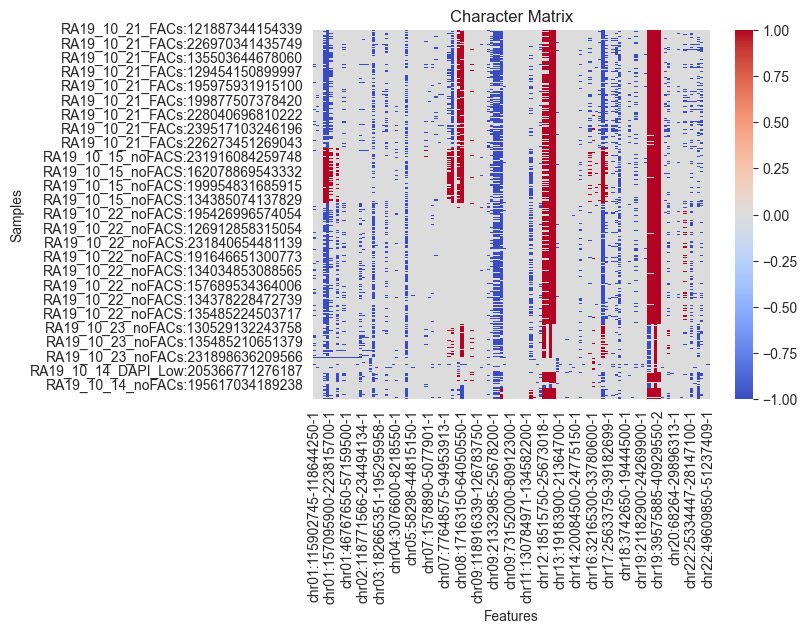

In [5]:
# Optionally, we can encode CNVs as ternary values, to enforce more similarity between +1 and +2 alterations, rather than, say 0 and +2 alterations.

encoded_cm = picasso.encode_cnvs_as_ternary(character_matrix)
print(f'The character encoded matrix has {encoded_cm.shape[0]} samples and {encoded_cm.shape[1]} features.')

plt.figure()
sns.heatmap(encoded_cm, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Character Matrix')
plt.show()
plt.close()




In [6]:
character_matrix = encoded_cm

## Feature Selection

We can speed up the runtime of PICASSO by removing any features which are not informative for separating samples; these may be features with insufficient variation across samples. 

We can also optionally do denoising by setting mutations with a low frequency to zero.

In [7]:
# Filter out CNA regions which are modal with a proportion greater than 0.99

print(f'There are {character_matrix.shape[1]} features before filtering.')
character_matrix = character_matrix.loc[:,(character_matrix.values == character_matrix.mode(axis=0).values).mean(axis=0) < 0.99]
print(f'There are {character_matrix.shape[1]} features after filtering.')


There are 121 features before filtering.
There are 69 features after filtering.


Text(0.5, 1.0, 'Character Matrix after Filtering')

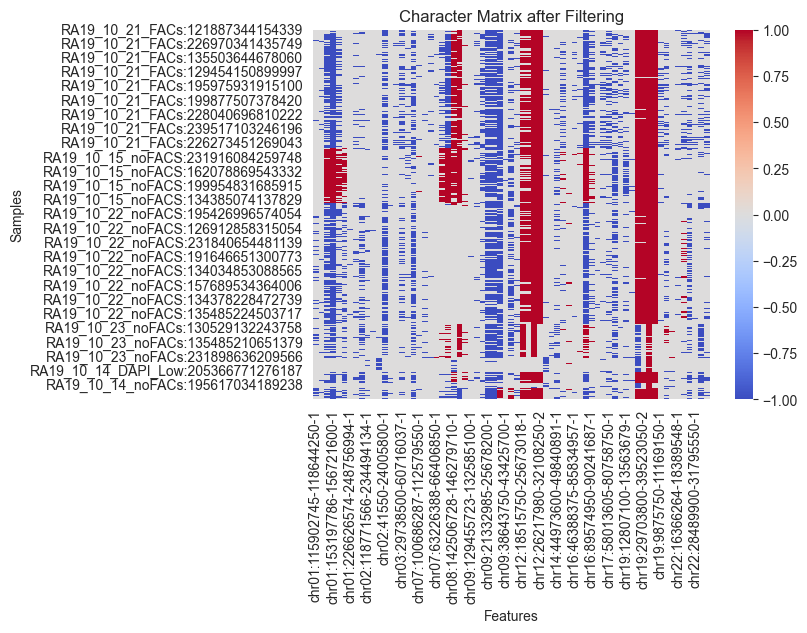

In [8]:
sns.heatmap(character_matrix, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Character Matrix after Filtering')

# Construct Phylogeny

We can now construct a phylogeny using the filtered character matrix. We will construct a model using the PICASSO algorithm.

In [17]:
from picasso import Picasso

model = Picasso(character_matrix,
                min_depth = 2,
                max_depth=None, 
                min_clone_size = 5,
                terminate_by= 'probability',
                assignment_confidence_threshold=0.8,
                assignment_confidence_proportion=0.9)

In [18]:
model.fit()

Tree Depth 1: 1 clone(s), 0 terminal clone(s).Force Split: True
100%|██████████| 1/1 [00:02<00:00,  2.99s/it]
Tree Depth 2: 2 clone(s), 0 terminal clone(s).Force Split: True
100%|██████████| 2/2 [00:06<00:00,  3.19s/it]
Tree Depth 3: 4 clone(s), 0 terminal clone(s).Force Split: False
100%|██████████| 4/4 [00:08<00:00,  2.22s/it]
Tree Depth 4: 8 clone(s), 0 terminal clone(s).Force Split: False
100%|██████████| 8/8 [00:06<00:00,  1.25it/s]
Tree Depth 5: 16 clone(s), 0 terminal clone(s).Force Split: False
100%|██████████| 16/16 [00:07<00:00,  2.20it/s]
Tree Depth 6: 32 clone(s), 0 terminal clone(s).Force Split: False
100%|██████████| 32/32 [00:07<00:00,  4.47it/s]
Tree Depth 7: 62 clone(s), 2 terminal clone(s).Force Split: False
100%|██████████| 62/62 [00:06<00:00,  9.31it/s]
Tree Depth 8: 113 clone(s), 11 terminal clone(s).Force Split: False
100%|██████████| 113/113 [00:06<00:00, 17.37it/s]
Tree Depth 9: 196 clone(s), 30 terminal clone(s).Force Split: False
100%|██████████| 196/196 [00:0

In [19]:
phylogeny = model.get_phylogeny()
# Uncomment the line below to show the phylogeny in a new window
# phylogeny.show()

In [20]:
clone_assignments = model.get_clone_assignments()

# Tree Manipulation

We can now use the clone assignments to construct a clone tree. We can also root the tree at a specific clone to get a more meaningful representation of the phylogeny.

In [21]:
from picasso import  CloneTree
tree = CloneTree(phylogeny, clone_assignments, character_matrix, clone_aggregation='mode')

Initialized CloneTree with 470 clones and 10000 samples.


In [22]:
outgroup = tree.get_most_ancestral_clone()
tree.root_tree(outgroup)

In [23]:
clone_tree = tree.get_clone_phylogeny()
# We can extract the newick string for the clone tree for use in other programs (e.g. ITOL for visualization)
print(clone_tree.write()) 


(1-1-0-0-0-0-1-0-1-STOP:0.5,((((1-1-0-0-0-0-1-0-0-1-STOP:1)1:1,((1-1-0-0-0-0-1-0-0-0-1-STOP:1)1:1,(1-1-0-0-0-0-1-0-0-0-0-STOP:1)1:1)1:1)1:1,((((1-1-0-0-0-0-1-1-0-0-STOP:1)1:1,((1-1-0-0-0-0-1-1-0-1-0-STOP:1)1:1,(1-1-0-0-0-0-1-1-0-1-1-STOP:1)1:1)1:1)1:1,((1-1-0-0-0-0-1-1-1-1-STOP:1)1:1,(1-1-0-0-0-0-1-1-1-0-STOP:1)1:1)1:1)1:1,(((1-1-0-0-0-0-0-0-STOP:1)1:1,((1-1-0-0-0-0-0-1-0-STOP:1)1:1,((1-1-0-0-0-0-0-1-1-1-STOP:1)1:1,((1-1-0-0-0-0-0-1-1-0-0-STOP:1)1:1,(1-1-0-0-0-0-0-1-1-0-1-STOP:1)1:1)1:1)1:1)1:1)1:1,(((((1-1-0-0-0-1-0-1-1-STOP:1)1:1,((1-1-0-0-0-1-0-1-0-0-STOP:1)1:1,((1-1-0-0-0-1-0-1-0-1-1-STOP:1)1:1,(1-1-0-0-0-1-0-1-0-1-0-STOP:1)1:1)1:1)1:1)1:1,(1-1-0-0-0-1-0-0-STOP:1)1:1)1:1,((1-1-0-0-0-1-1-1-STOP:1)1:1,((1-1-0-0-0-1-1-0-0-STOP:1)1:1,(1-1-0-0-0-1-1-0-1-STOP:1)1:1)1:1)1:1)1:1,(((((1-1-0-0-1-0-0-1-STOP:1)1:1,((1-1-0-0-1-0-0-0-0-STOP:1)1:1,(1-1-0-0-1-0-0-0-1-STOP:1)1:1)1:1)1:1,(((1-1-0-0-1-0-1-0-1-STOP:1)1:1,((1-1-0-0-1-0-1-0-0-0-STOP:1)1:1,(1-1-0-0-1-0-1-0-0-1-STOP:1)1:1)1:1)1:1,((((1-1-

In [24]:
cell_tree = tree.get_sample_phylogeny()
# Uncomment the line below to show the phylogeny in a new window
# cell_tree.show()
# We can also extract the newick string for the clone tree
# print(cell_tree.write()) 


Added 10000 leaves to the tree.


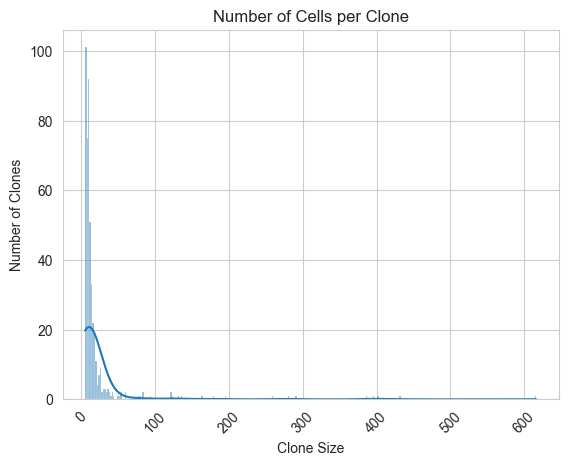

In [25]:
tree.plot_clone_sizes()

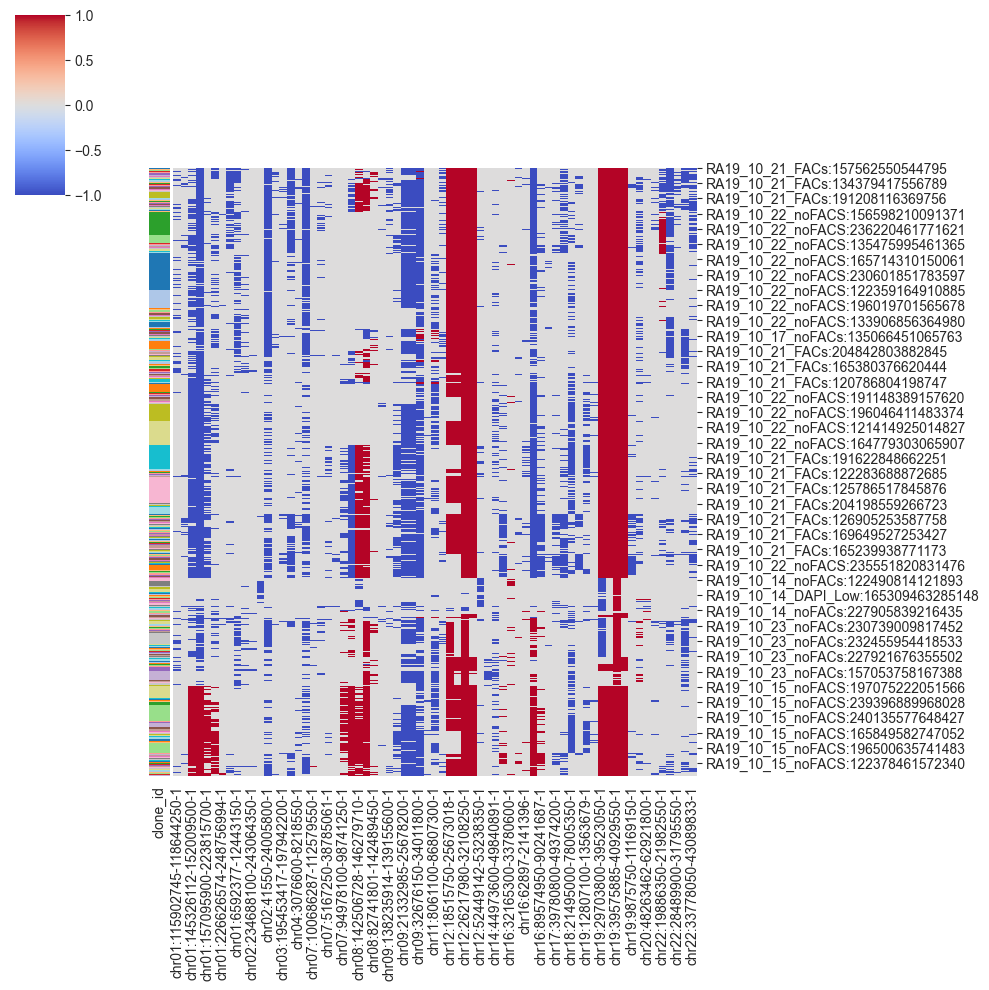

In [26]:
tree.plot_alterations()

# Detailed Visualization

For more detailed visualization, we recommend the iTOL website/application, which accepts as input a newick string and allows for detailed customization of the tree visualization.

We provide some convenience functions for ITOL annotation files to visualize metadata on the tree. For more complex visualizations, templates are available on the ITOL <a href="https://itol.embl.de/help.cgi#datasets">documentation.</a>


In [27]:
# First, we can visualize the heatmap of copy number changes themselves
heatmap_annot = picasso.itol.dataframe_to_itol_heatmap(character_matrix)

# Save the heatmap annotation to a file
with open('heatmap_annotation.txt', 'w') as f:
    f.write(heatmap_annot)

In [28]:
# We can also generate colorstrips to annotate some property of the leaves in a tree.
import numpy as np
import pandas as pd
 
# Let us generate some random data mapping leaves of the tree to sites ['A', 'B', 'C', 'D']
random_data = np.random.choice(['A', 'B', 'C', 'D'], size=len(cell_tree.get_leaves()))
sites_series = pd.Series(random_data, index=character_matrix.index, name='Sites')

# We must also define a colormap for the sites
site_color_map = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'yellow'}

colorstrip_annot = picasso.itol.dataframe_to_itol_colorstrip(sites_series, site_color_map, dataset_label='Sites')
with open('colorstrip_annotation.txt', 'w') as f:
    f.write(colorstrip_annot)


In [29]:
# We can also show compositional data using stacked bar charts; to illustrate, we will use the composition of sites in each clone.
# Such a stacked bar chart can be used to visualize the clone tree compositions in the cell tree is too large to visualize each 
# cell's site individually.
sites_by_clone = clone_assignments.merge(sites_series, left_index=True, right_index=True)

# Compute the proportion of each site in each clone
site_proportions = sites_by_clone.groupby('clone_id').apply(lambda x: x['Sites'].value_counts(normalize=True)).unstack().fillna(0)

stackedbar_annot = picasso.itol.dataframe_to_itol_stackedbar(site_proportions, site_color_map, dataset_label='Sites')
with open('stackedbar_annotation.txt', 'w') as f:
    f.write(stackedbar_annot)
    

/var/folders/m5/c9fbkvps3xlbq5qznlx2n4h00000gn/T/ipykernel_92277/2650531813.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  site_proportions = sites_by_clone.groupby('clone_id').apply(lambda x: x['Sites'].value_counts(normalize=True)).unstack().fillna(0)
